In [1]:
from sympy import exp, cosh, sinh, init_printing, pprint, simplify, latex, symbols,\
  Function, sign, factor, fraction, pi, integrate,oo
from sympy.abc import a,b
from sympy import inverse_fourier_transform, fourier_transform
init_printing()

Starting from the membrane equation with one (current-based) synaptic event:

\begin{equation}
C_m \frac{dV}{dt} =  g_L \, (E_L - V) + g_S \, (\mu_V - V) + I_{\mu V} \pm Q_i \, e^{-t/\tau_S} \, \mathcal{H}(t)
\end{equation}

Note the shunting conductance of reversal potential $\mu_V$ and $ I_{\mu V} = g_L \, (\mu_V - E_L)$, we can thus rewrite the equation for $V = V- \mu_V$, we get:

\begin{equation}
C_m \frac{dV}{dt} = - \mu_G \, V  \pm Q_i \, e^{-t/\tau_S} \, \mathcal{H}(t)
\end{equation}

where $\mu_G = (g_L+g_S)$ is the total conductance. 


Thus, a single excitatory or inhibitory post-synaptic potential event from
this input will have the following time course around $\mu_V$:


\begin{equation}
 PSP(t) = \pm \frac{ Q_I \, \tau_S \, (e^{-\frac{t}{\tau_\mathrm{m}^\mathrm{eff}}} - e^{-\frac{t}{\tau_S}})}{\mu_G \,
 (\tau_\mathrm{m}^\mathrm{eff} - \tau_S)}  \, \mathcal{H}(t)
\end{equation}

Where we introduced $\tau_\mathrm{m}^\mathrm{eff} = \frac{C_m}{\mu_G}$

Form of the Post-Synaptic Potential event:


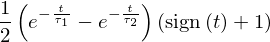

In [2]:
# we simplify it, to take the 

f, t, T1, T2 = symbols('f, t, tau_1, tau2', real=True)
PSP = Function('PSP')
PSP = (exp(-t/T1)-exp(-t/T2))*(1+sign(t))/2
print 'Form of the Post-Synaptic Potential event:' 
PSP

Fourier Transform of the PSP event:


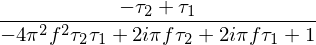

In [3]:
print 'Fourier Transform of the PSP event:'
PSP_hat = Function('PSP_hat')
PSP_hat = factor(fourier_transform(PSP, t, f))
numerator, denominator = fraction(PSP_hat)
simplify(PSP_hat)

Square modulus of the Fourier Transform of the PSP event:


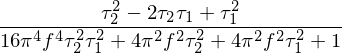

In [4]:
from sympy.functions import Abs, conjugate
print 'Square modulus of the Fourier Transform of the PSP event:'
PSP_hat2 = simplify((PSP_hat)*conjugate(PSP_hat))
numerator, denominator = fraction(PSP_hat2)
PSP_hat2

In [5]:
# we simplify
simplify(numerator), factor(simplify(denominator))

We reintroduce the appropriate constants, we get;

\begin{equation}
  \| \hat{PSP(f)} \|^2 = \Big( \frac{Q_I \, \tau_S}{ \mu_G \, (\tau_\mathrm{m}^\mathrm{eff} - \tau_S) } \Big)^2
  \, \frac{ (\tau_S - \tau_\mathrm{m}^\mathrm{eff})^2 }{
  \big(1+4 \pi^2 f^2 \tau_S^2 \big) \big(1+4 \pi^2 f^2 (\tau_m^\mathrm{eff})^2 \big)}
\end{equation}

thus

\begin{equation}
  \| \hat{PSP(f)} \|^2 = \Big( \frac{Q_I \, \tau_S}{ \mu_G \, } \Big)^2
  \, \frac{ 1}{
  \big(1+4 \pi^2 f^2 \tau_S^2 \big) \big(1+4 \pi^2 f^2 (\tau_m^\mathrm{eff})^2 \big)}
\end{equation}


Then we want the power spectrum, i.e. two independent shotnoise (exc. and inh.) of the same shotnoise properties.

From shotnoise theory, we have:

\begin{equation}
\begin{split}
 P_V(f)  = & \sum_{syn} \nu_{syn} \, \| \hat{\mathrm{PSP}}(f) \|^2 \\
 & = 2 \nu_{in} \, \frac{Q_I^2 \, \tau_S^2 / \mu_G^2 }{
 \big(1+4 \pi^2 f^2 \tau_S^2 \big) \big(1+4 \pi^2 f^2 (\tau_m^\mathrm{eff})^2 \big)}
\end{split}
\end{equation}



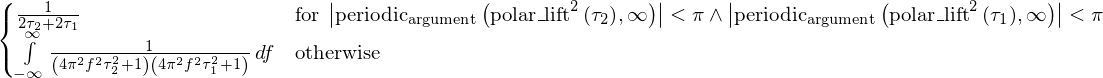

In [7]:
# we will need to integrate this

func = Function('func')
func = 1/((1+4*pi**2*T1**2*f**2)*(1+4*pi**2*T2**2*f**2))
simplify(integrate(func, (f, -oo, oo)))

Then for the variance 

\begin{equation}
  \big( \sigma_V \big)^2 = \int_\mathbb{R} P_V(f) \, df =
  2 \, \nu_{in} \cdot  \Big( \frac{Q_I \, \tau_S}{ \mu_G \, } \Big)^2
  \,  \int_\mathbb{R} \frac{ 1}{
  \big(1+4 \pi^2 f^2 \tau_S^2 \big) \big(1+4 \pi^2 f^2 (\tau_m^\mathrm{eff})^2 \big)}
\end{equation}


\begin{equation}
  \big( \sigma_V \big)^2 = \int_\mathbb{R} P_V(f) \, df =
   \frac{ \nu_{in} \cdot }{ \tau_S +\tau_m^\mathrm{eff}} \, \Big( \frac{Q_I \, \tau_S}{ \mu_G \, } \Big)^2
\end{equation}



Our definition is:

\begin{equation}
  \tau_V = \frac{1}{2} \, \big( \frac{\int_\mathbb{R} P_V(f) \, d f}{ P_V(0) } \big)^{-1}
\end{equation}

and:

\begin{equation}
  \int_\mathbb{R} P_V(f) \, d f =  \frac{ P_V(0) }{ 2 \, (\tau_S +\tau_m^\mathrm{eff})}
\end{equation}

So:

\begin{equation}
  \tau_V = \tau_S +\tau_m^\mathrm{eff}
\end{equation}

